# 3.1 ndarray与Python原生list运算效率对比

In [2]:
import numpy as np 
import random 
import time

py_lst = []
for i in range(100_000_000):
    py_lst.append(random.random())

In [3]:
ndarray_lst = [random.random() for _ in range(100_000_000)]


In [4]:
t1 = time.time()
a = sum(py_lst)
t2 = time.time()
rs1 = t2-t1
print(f"sum py_lst time: {rs1}")

t3 = time.time()
a = sum(ndarray_lst)
t4 = time.time()
rs2 = t4-t3
print(f"sum ndarray_lst time: {rs2}")

sum py_lst time: 12.526848793029785
sum ndarray_lst time: 8.89683485031128


### 1. 存储风格 
从图中我们可以看出ndarray:在存储数据的时候,数据与数据的地址都是连续的,这样就给使得批量操作数组元素时速度更快.
这是因为ndarray中的所有元素的类型都是相同的,而Python列表中的元素类型是任意的,所以ndarray在存储元素时内存可以连续,而oython.原生list就只能通过寻址方式找到下一个元素,这虽然也导致了在通用性能方面Numpy的ndarray不及Python原生Iist,但在科学计算中,Numpy 的ndarray就可以省掉很多循环语句,代码使用方面比Python原生Iist简单的多.

### 2 ndarray支持并行化运算(向量化运算)
### 3 Nupy底层使用C语言编写,内部解除了GL(全局解释器锁),其对数组的操作速度不受Python解释器的限制,效率远高于纯Python代码.


# 3.2 ndarray 属性

 属性名字                  属性解释
ndarray.shape           数组维度的元组
ndarray.ndim            数组维数(中括号个数)
ndarray.size            数组中的元素数量
ndarray.itemsize        一个数组元素的长度(字节)
ndarray.dtype           数组元素的类型(默认数据类型:int64,8字节)


# 3.3 基本操作

3.3.1.ndarray.方法()

3.3.2.np.函数名()

3.3.3 生成数组的方法
 1. 生成0,1 
    np.zeros(), np.ones()
 2. 从现有数组中生成
    np.array(), np.copy():深拷贝
    np.asarray()         :浅拷贝
 3. 生成固定范围的数组
    np.linspace(0,10,100) : [0,10] 100个等距离的数组
    np.arrange(a,b,c)     : [a,b) 步长为c的数组
 4. 生成随机数组
    分布状况-直方图
      1)均匀分布
      2)正态分布

In [5]:
import numpy as np 

#  1. 生成0,1数组
np.zeros(shape=(3,4),dtype='float32') 
np.ones(shape=(3,4),dtype='int32') 

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]], dtype=int32)

In [6]:
#  2. 从现有数组中生成
import numpy as np 
py_lst = np.array([[11,22,14],[15,36,21],[52,63,65],[41,78,95],[68,41,25]])

data1 = np.array(py_lst)
data2 = np.asarray(py_lst)
data3 = np.copy(py_lst)
# print(data1)
# print(data2)
# print(data3)
print("*"*20)
py_lst[1,1] = 10000
print(data1)
print(data2)
print(data3)


********************
[[11 22 14]
 [15 36 21]
 [52 63 65]
 [41 78 95]
 [68 41 25]]
[[   11    22    14]
 [   15 10000    21]
 [   52    63    65]
 [   41    78    95]
 [   68    41    25]]
[[11 22 14]
 [15 36 21]
 [52 63 65]
 [41 78 95]
 [68 41 25]]


In [7]:
# 3. 生成固定范围的数组
import numpy as np 
np.linspace(0,10,5) # 0-10 等间距的5个数

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

In [8]:
import numpy as np 

np.arange(0,10,5) #0-10,步长5

array([0, 5])

In [9]:
import numpy as np 
#  4. 生成随机数组 - 均匀分布
# 均匀分布(Uniform Distribution)是概率统计中的重要分布之一.顾名思义,均匀,表示可能性相等的含义.均匀分布在自然情况下极为罕见,而人工栽培的有一定株行距的植物群落即是均匀分布.

data1 = np.random.uniform(low=-1,high=1,size=100000) #low:采样下届,默认0; high:采样上届(不包含high),默认1; size:数据个数

data1


array([-0.95603105, -0.34384502, -0.72085234, ...,  0.53449061,
        0.48328942,  0.94907008])

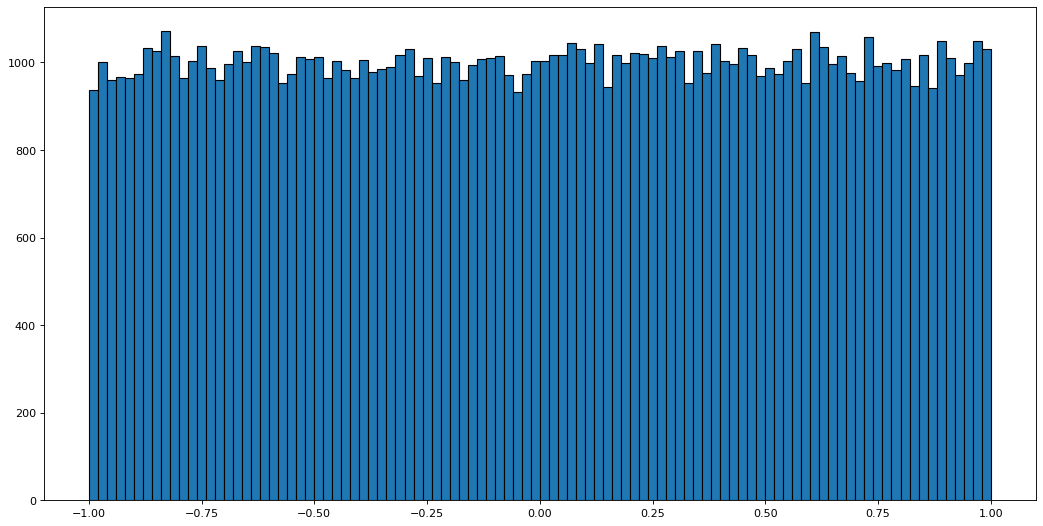

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8), dpi=80)
plt.hist(data1,bins=100,edgecolor='k')
plt.show()


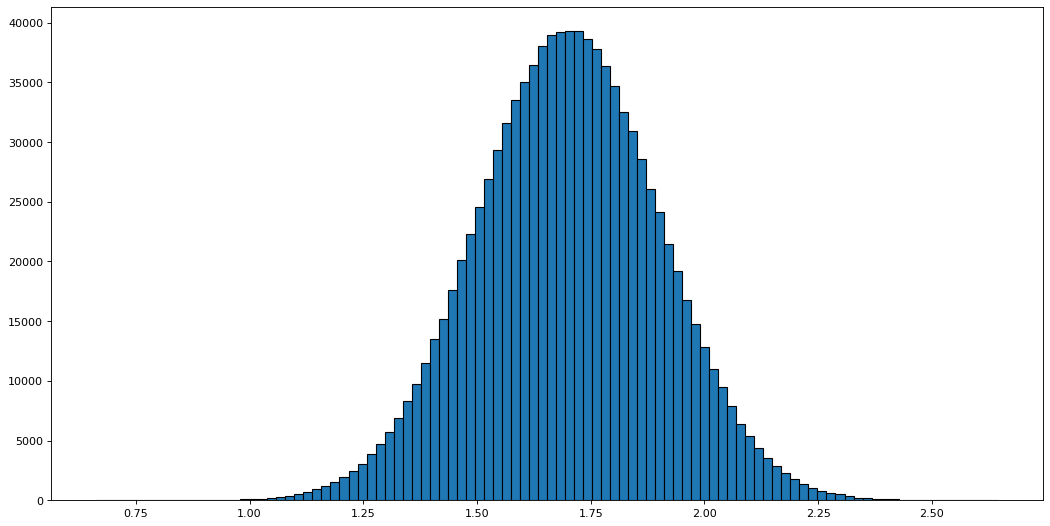

In [11]:
#  4. 生成随机数组 - 正态分布
import numpy as np 
import matplotlib.pyplot as plt

data2 = np.random.normal(loc=1.7,scale=0.2,size=1000000) #loc:分布均值, scale:标准差, size:数据个数

plt.figure(figsize=(16,8), dpi=80)
plt.hist(data2,bins=100,edgecolor='k')
plt.show()

### 3.3.4 数组切片,索引

<!-- ### 案例:随机生成8只股票2周的交易日涨幅数据 -->

In [12]:
import numpy as np 
stock_change = np.random.normal(loc=0,scale=1,size=(8,10)) # 正态分布数据
stock_change

array([[-0.4939465 ,  0.63734835, -1.46636389, -1.77356956,  0.37960362,
        -0.39024188, -0.52695423, -0.60513266,  1.78271244,  1.04241719],
       [-0.73077963, -0.06381012,  0.47211968,  0.74068973, -1.43725124,
         0.95738621, -1.69210683, -0.35251075, -0.8248082 ,  1.29974535],
       [ 2.34642196, -0.74844483, -0.82625068, -0.03323046,  0.1389511 ,
        -0.66437221,  0.30281202,  0.75350022, -0.03502474, -0.55263406],
       [ 0.47125226, -2.25117626,  0.58839811, -0.7229321 ,  0.05220533,
         0.30419268, -0.61814889,  0.00659785, -2.06775365,  1.75683288],
       [ 0.36657296,  0.6995048 , -1.53179617,  0.3501531 ,  0.42218814,
         0.43024159,  0.91687062, -0.39915097, -0.79984955,  0.87955503],
       [-0.02234989,  1.38980604,  0.70469219, -0.59278989, -0.24759484,
         0.78559661,  0.87638997,  0.46907464, -1.53392381,  0.17910699],
       [ 0.28345568, -0.06372273,  0.57204754, -0.68109829,  0.37851212,
         0.02944932,  0.55250367,  0.46100491

In [13]:
import numpy as np 
import matplotlib.pyplot as plt
#获取第一个股票的前3个交易日的涨跌幅数据
stock_change[0,0:3]

array([-0.4939465 ,  0.63734835, -1.46636389])

In [14]:
a1 = np.array([[[1,2,3],[4,5,6]],[[12,3,4],[5,6,7]]])
a1.shape
a1[1,0,2]=10000000000
a1


array([[[          1,           2,           3],
        [          4,           5,           6]],

       [[         12,           3, 10000000000],
        [          5,           6,           7]]])

### 3.3.5 形状修改
  1. ndarray.reshape()
  2. ndarray.resize()
  3. ndarray.T

In [15]:
# 1. ndarray.reshape()
stock_change
stock_change.reshape((10,8))  # 只修改形状
# 2. ndarray.resize()
stock_change.resize((10,8)) # 无返回值, 原始数据不变
stock_change.shape
stock_change
# 3. ndarray.T # 转置
stock_change.T.shape


(8, 10)

### 3.3.5 类型修改
    1. ndarray.astype(type)
    2. ndarray.tobytes() ndarray 序列化到本地 


In [16]:
import numpy as np 
stock_change.astype("int32")


array([[ 0,  0, -1, -1,  0,  0,  0,  0],
       [ 1,  1,  0,  0,  0,  0, -1,  0],
       [-1,  0,  0,  1,  2,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, -2],
       [ 0,  0,  0,  0,  0,  0, -2,  1],
       [ 0,  0, -1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, -1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0],
       [-1,  0,  1,  0,  0,  0, -1,  0]], dtype=int32)

In [17]:
import numpy as np 
stock_change.tobytes()

b'\xe7<\x86\xc6\xd1\x9c\xdf\xbf\x94\xf6\r\\(e\xe4?E\x96\x87\xfc9v\xf7\xbf\xc5K\x7fy\x8a`\xfc\xbf\x115;\xfalK\xd8?\xdb\xfc\x05\x16\xb9\xf9\xd8\xbf\xe8\xe6\x9a\x1d\xcf\xdc\xe0\xbf7\xe3\x90*?]\xe3\xbf#\x1c){\xfd\x85\xfc?N|/\xa5\xbd\xad\xf0? \x12\x99\xf6\x8bb\xe7\xbf \xa7\x8b\x1c\xdcU\xb0\xbf-\xd0\xa8w57\xde?\xe1a\xec\xf4\xba\xb3\xe7?\x9f\xc1\x04(\xfb\xfe\xf6\xbf\xa3\xdc\xd9e\xe8\xa2\xee?\x94\xa1|\x9c\xde\x12\xfb\xbfxr\x9c=\x89\x8f\xd6\xbf\xf6\x16x+\xd4d\xea\xbf\xc0\xea\x03\xc9\xc1\xcb\xf4?\xb91\x11\xe1x\xc5\x02@\x9e\x16y\x92B\xf3\xe7\xbf\xffl\x19F\xa5p\xea\xbfs\x96\xc3_\x95\x03\xa1\xbf\x02G\xe5J&\xc9\xc1?a\xae2\x82\x89B\xe5\xbfZx\xdd\xafEa\xd3?\x030[\x7f\xac\x1c\xe8?\xe7\xed\xbd"\xc3\xee\xa1\xbf\t\x156\xa0-\xaf\xe1\xbf\xa9jG;\xff(\xde?\x86\x02\t\xb3h\x02\x02\xc0\xb3\x1dXG(\xd4\xe2?\xab\x1dh\x82B"\xe7\xbf\xd1\n19\xa8\xba\xaa?\x91\x058\x8e\xe4w\xd3?\xca\x0c+/\xe0\xc7\xe3\xbf\x1d\x0e\x1d\xc0W\x06{?\xa4\xfd\x9fm\xc2\x8a\x00\xc0\xa4\x1d}\xca\xfc\x1b\xfc?~v\x1eq\xeeu\xd7?\x03_g\xe5Wb\xe6?W\xd9Y

### 3.3.5 数组去重
 1. ndarray.unique()
 2. 打平后用set()

In [18]:
data = np.array([[1,2,3,5],[4,1,2,3],[6,2,1,2],[1,2,1,2]])
data

array([[1, 2, 3, 5],
       [4, 1, 2, 3],
       [6, 2, 1, 2],
       [1, 2, 1, 2]])

In [19]:
np.unique(data)

array([1, 2, 3, 4, 5, 6])

In [20]:
data.flatten()
set(data.flatten())

{np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)}

# 3.4 nd array运算

## 3.4.1 逻辑运算

In [21]:

import numpy as np 
stock_change = np.random.normal(loc=0,scale=1,size=(8,10)) # 正态分布数据
stock_change
# 逻辑判断,如果涨跌幅大于0.5就标记为True否则为Fa1se
stock_change > 0.5

array([[ True, False, False,  True, False,  True, False,  True, False,
        False],
       [False, False, False,  True,  True, False,  True, False,  True,
        False],
       [False, False, False,  True, False,  True, False, False,  True,
        False],
       [ True,  True,  True, False, False,  True, False, False, False,
        False],
       [False,  True, False,  True,  True, False, False, False,  True,
        False],
       [False, False, False,  True, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
         True],
       [False, False, False, False,  True, False, False, False, False,
        False]])

In [22]:
# 1.1 布尔索引
stock_change[stock_change > 0.5] = 1 # 涨跌幅大于0.5赋值为1
stock_change

array([[ 1.        ,  0.20206716, -1.73486028,  1.        , -0.16368486,
         1.        , -0.22431945,  1.        , -1.28873253,  0.34000378],
       [-0.15627037, -0.13898254, -0.02909423,  1.        ,  1.        ,
        -2.11740651,  1.        ,  0.14161632,  1.        , -1.68913905],
       [-0.97917756, -0.97137775, -1.76762128,  1.        , -1.19408795,
         1.        , -0.23025577,  0.28088451,  1.        ,  0.08832485],
       [ 1.        ,  1.        ,  1.        , -0.89398337, -0.01807362,
         1.        ,  0.10139783, -0.93751247, -0.16698999, -0.48715142],
       [ 0.26042794,  1.        ,  0.30502084,  1.        ,  1.        ,
        -0.37012441, -1.13197497,  0.13380389,  1.        ,  0.36182162],
       [ 0.38470442, -1.55595767,  0.28558519,  1.        , -0.1466891 ,
        -1.2476563 , -1.15566658, -0.5041319 , -1.33421874,  0.47689258],
       [-0.26967133,  0.2937419 , -0.2152065 , -0.63250848, -0.47753982,
        -0.20589911, -1.03612477, -1.73671689

In [23]:
# 1.2 通用判断函数
# 1.2.1 np.all(布尔值) 传入的布尔值全部为true时,才为true, 类似 与逻辑
# 判断stock_change[0:2,0:5] 是否全部上涨
stock_change[0:2,0:5] > 0
np.all(stock_change[0:2,0:5]>0.5)


np.False_

In [24]:
# 1.2.2 np.any(布尔值) 传入的布尔值有一个为true时,就为true, 类似 或逻辑
# 判断前5只股票这段期间是否有上涨的
stock_change[0:5,:] > 0
np.any(stock_change[0:5,:]>0.5)

np.True_

In [27]:
# 1.3 三元运算符
# 1.3.1 np.where(布尔值,true位置的值,false位置的值)  
#判断前四个股票前四天的涨跌幅大于0的置为1,否则为0

temp = stock_change[:4,:4]
np.where(temp>0,1,0) # 大于0的置为1,否则为0


array([[1, 1, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 1, 1, 0]])

In [30]:

# 1.4 np.logical_and 逻辑与
# 判断前四个股票前四天的涨跌幅大于0.5并且小于1的,换为1,否则为0
temp = stock_change[:4,:4]
np.logical_and(temp>0.5,temp<1)

array([[False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False]])

In [31]:
# 1.5 np.logical_or 逻辑或
#判断前四个股票前四天的涨跌幅大于0.5或者小于-0.5的,换为1,否则为0
temp = stock_change[:4,:4]
np.logical_or(temp>0.5,temp<1)

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

## 3.4.2 统计运算 

In [26]:

#2.1 统计指标函数 
    # max min mean median var std
    # np.方法名
    # ndarray.方法名



In [40]:
temp

array([[ 1.        ,  0.20206716, -1.73486028,  1.        ],
       [-0.15627037, -0.13898254, -0.02909423,  1.        ],
       [-0.97917756, -0.97137775, -1.76762128,  1.        ],
       [ 1.        ,  1.        ,  1.        , -0.89398337]])

In [41]:
#前四只股票前四天的最大涨幅

# way 1
# temp.max(axis=0)  # 每一列的最大值 array([1., 1., 1., 1.])
temp.max(axis=1)    # 每一行的最大值 array([1., 1., 1., 1.])
# way2 
# np.max(temp,axis=1)

array([-1.73486028, -0.15627037, -1.76762128, -0.89398337])

In [43]:
#2.2 返回最大值、最小值所在位置
np.argmax(temp,axis=1)
np.argmin(temp,axis=1)

array([2, 0, 2, 3])

## 3.4.3 数组间运算

### 1 数组与数的运算

In [47]:

import numpy as np


arr = np.array([[1,1,2,3,2,1],[2,3,5,41,4,9]])
print(arr + 1) # 作用到数组的每一个元素

[[ 2  2  3  4  3  2]
 [ 3  4  6 42  5 10]]


### 2 数组与数组的运算

In [ ]:
import numpy as np

arr1 = np.array([[1,2,3,2,1,4],[5,6,1,22,3,1]])
arr2 = np.array([[1,2,3,4],[3,4,5,6]])
# print(arr1+arr2)  两个数组形状不同不能做运算
# # ValueError: operands could not be broadcast together with shapes (2,6) (2,4) 

In [ ]:
# 3 广播机制
# 执行broadcast的前提在于,两个ndarray执行的是element-wise的运算,Broadcast机制的功能是为了方便不同形状的ndarray(numpy库的核心数据结构)进行数学运算.
# 当操作两个数组时,numpy会逐个比较它们的shape(构成的元组tuple),只有在下述情况下,两个数组才能够进行数组与数组的运算.
# 维度相等
# shape(其中相对应的一个地方为1)
# 最终结果取每个维度的最大值

In [5]:
import numpy as np
arr1 = np.array([[1,2,3,2,1,4],[5,6,1,2,3,1]])
arr2 = np.array([[1],[3]])
print(arr1.shape)
print(arr2.shape)
print(arr1+arr2)

(2, 6)
(2, 1)
[[2 3 4 3 2 5]
 [8 9 4 5 6 4]]


### 3 矩阵运算


矩阵,英文matrix,和array的区别矩阵必须是2维的,但是array可以是多维的.

In [ ]:

# 两种方法存储矩阵
# 1) ndarray 二维数组
# 2) matrix

In [7]:
# 1) ndarray 二维数组
data = np.array([[80,86],
                 [82,80],
                 [85,78],
                 [90,90],
                 [86,82],
                 [82,90],
                 [78,82],
                 [92,94]])
print(data)

[[80 86]
 [82 80]
 [85 78]
 [90 90]
 [86 82]
 [82 90]
 [78 82]
 [92 94]]


In [9]:
# 2) matrix
data_mat = np.asmatrix([[80,86],
                 [82,80],
                 [85,78],
                 [90,90],
                 [86,82],
                 [82,90],
                 [78,82],
                 [92,94]])
data_mat

matrix([[80, 86],
        [82, 80],
        [85, 78],
        [90, 90],
        [86, 82],
        [82, 90],
        [78, 82],
        [92, 94]])

In [13]:
# 1. 矩阵乘法运算
# 形状 (m,n) * (n,l) = (m,l)
# 运算规则

# 数组矩阵乘法api np.matmul  np.dot
fac = np.array([[0.3],[0.7]]) #(2,1)
data = np.array([[80,86],
                 [82,80],
                 [85,78],
                 [90,90],
                 [86,82],
                 [82,90],
                 [78,82],
                 [92,94]])
# data_mat #(8,2)
# final_res = np.matmul(data_mat,fac)  # 注意数据的顺序
final_res = np.dot(data_mat,fac) 
final_res

matrix([[84.2],
        [80.6],
        [80.1],
        [90. ],
        [83.2],
        [87.6],
        [80.8],
        [93.4]])

In [14]:

# 矩阵直接相乘 
data_mat = np.asmatrix([[80,86],
                 [82,80],
                 [85,78],
                 [90,90],
                 [86,82],
                 [82,90],
                 [78,82],
                 [92,94]])
fac_mat = np.asmatrix([[0.3],[0.7]]) #(2,1)

final_res = data_mat * fac_mat
final_res


matrix([[84.2],
        [80.6],
        [80.1],
        [90. ],
        [83.2],
        [87.6],
        [80.8],
        [93.4]])

In [16]:
# 2. 数组合并与分割 水平,垂直

# 1 np.hstack()
a = np.array((1,2,3))
b = np.array((2,2,3))
np.hstack((a,b))

array([1, 2, 3, 2, 2, 3])

In [19]:
a = np.array([[1],[2],[3]])
b = np.array([[2],[2],[3]])
np.hstack((a,b))

array([[1, 2],
       [2, 2],
       [3, 3]])

In [20]:
# 2 np.vstack()
a = np.array((1,2,3))
b = np.array((2,2,3))
np.vstack((a,b))

array([[1, 2, 3],
       [2, 2, 3]])

In [21]:
a = np.array([[1],[2],[3]])
b = np.array([[2],[2],[3]])
np.vstack((a,b))

array([[1],
       [2],
       [3],
       [2],
       [2],
       [3]])

In [28]:
# 3 np.concatenate()
a = np.array([[1,2],[3,4]])
b = np.array([[5,6]])
print(a)
print("-"*20)
print(b)
print("-"*20)
print(np.concatenate((a,b)))
print("-"*20)
print(np.concatenate((a,b),axis=0))
print("-"*20)
print(np.concatenate((a,b.T),axis=1)) # b转置以后才能拼接

[[1 2]
 [3 4]]
--------------------
[[5 6]]
--------------------
[[1 2]
 [3 4]
 [5 6]]
--------------------
[[1 2]
 [3 4]
 [5 6]]
--------------------
[[1 2 5]
 [3 4 6]]


In [ ]:
# 3. 数组的分割
np.split()

# 3.7 IO操作与数据处理

问题:

大多数数据并不是我们自己构造的,而是存在文件当中,需要我们用工具获取.

但是Numpy:其实并不适合用来读取和处理数据,因此我们这里了解相关APl,以及Numpy不方便的地方即可.

In [ ]:
# 3.7.1 numpy 读取数据文件
# np.getfromtxt("filename",delimiter=",") # 不好用

In [ ]:
# 如何处理缺失值
# 按列取平均值进行填补